In [17]:
import seaborn as sns
from pollinator_model import PollinatorModel

processing
     Total Pollinators  Average Bee Health  Contaminated Bees
0                  100                 5.0                  0
1                  100                 5.0                  0
2                  100                 5.0                  0
3                  100                 5.0                  0
4                  100                 5.0                  0
..                 ...                 ...                ...
995                100                 4.6                 24
996                100                 4.6                 24
997                100                 4.6                 24
998                100                 4.6                 24
999                100                 4.6                 24

[1000 rows x 3 columns]


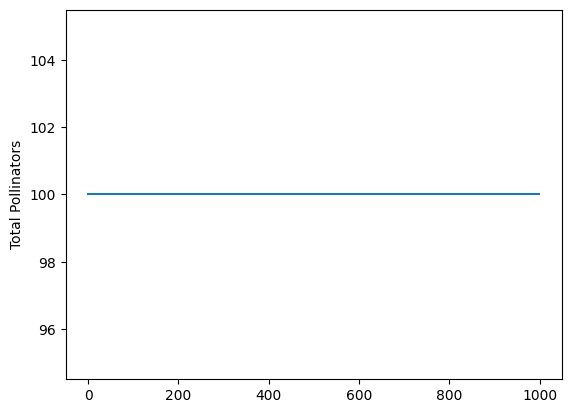

In [20]:
print('processing')
model = PollinatorModel(width=500, height=500, pesticide_ratio=0.1)
for _ in range(1000):
    model.step()
data = model.datacollector.get_model_vars_dataframe()
print(data)
g = sns.lineplot(data=data['Total Pollinators'])